In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from scipy.constants import c

from brightstar_input import date_str
from brightstar_functions import Phi

In [2]:
data = {}
file_name = "stars_visible_" + date_str + ".csv"
file_name = "1000stars_data.csv"
# Open the CSV file
with open(file_name, newline='') as csvfile:
    reader = csv.reader(csvfile)
    header = next(reader)  # Read the header row

    # Create an empty list for each column
    for column_name in header:
        data[column_name] = []

    # Iterate over each row in the CSV file
    for row in reader:
        # Iterate over each item in the row and append it to the respective column list
        for idx, item in enumerate(row):
            column_name = header[idx]  # Get the corresponding column name
            data[column_name].append(item)

In [3]:
# Function to get Phi value based on common name
def get_phi(common_name):
    index = data['Common'].index(common_name)
    return float(data['Phi_V'][index])  # Assuming Phi_V is the column name for Φ values

def area(diameter):
    return np.pi * (diameter/2)**2

def area_sub(diameter):
    return area((diameter*0.95)/2)

# Function to calculate SNR
def SNR(T, phi): # T in s
    efficiency = np.sqrt(epsilon_O_1*epsilon_O_2)*np.sqrt(epsilon_D_1*epsilon_D_2)
    area_background = np.sqrt((A_1*A_2)/((1+B_1/phi)*(1+B_2/phi)))
    channels = np.sqrt(N_channels)
    time = np.sqrt(T*3600/np.sqrt(delta_t_1*delta_t_2))
    Gamma = 0.5
    n = phi
    return efficiency*area_background*channels*time*n*Gamma**2



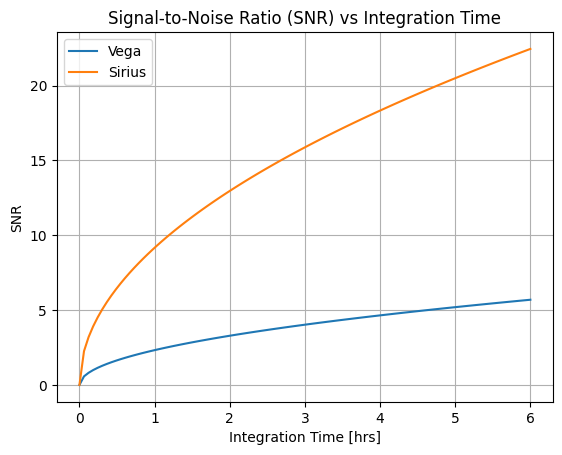

In [4]:
epsilon_O_1 = 0.5
epsilon_O_2 = 0.5
epsilon_D_1 = 0.25
epsilon_D_2 = 0.25
d_1 = 0.3
d_2 = 0.6
A_1 = area(d_1)
A_2 = area(d_2)
B_1 = 0
B_2 = 0
N_channels = 1 


delta_t_1 = 3e-11
delta_t_2 = 3e-11
"""
delta_t_1 = 10e-9
delta_t_2 = 10e-9
"""

# Generate diameters
hours = 6
T_0 = np.linspace(0, 6, 100)

# Plot SNR vs integration time T_0
plt.figure()

"""
for i, t in enumerate(T):
    plt.plot(diameters, snr(diameters, t), label=f'T = {T_[i]} hours')
"""
star_1 = "Vega"
star_2 = "Sirius"
Phi_1 = get_phi(star_1)
Phi_2 = get_phi(star_2)


plt.plot(T_0, SNR(T_0, Phi_1), label=star_1)
plt.plot(T_0, SNR(T_0, Phi_2), label=star_2)

plt.xlabel('Integration Time [hrs]')
plt.ylabel('SNR')
plt.title('Signal-to-Noise Ratio (SNR) vs Integration Time')
plt.legend()
plt.grid(True)
plt.show()

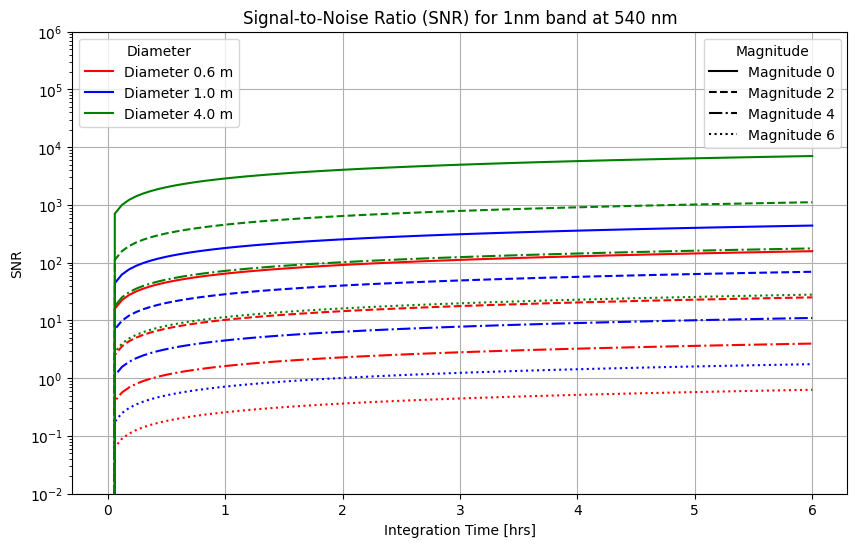

In [5]:
import matplotlib.lines as mlines

epsilon_O = 0.5
epsilon_D = 0.25
d = 0.3
A = area_sub(d)
B = 0
N_channels = 1 
lambda_ = 540e-9 # nm, wavelength filter for V-magnitude

delta_t = 3e-11

def SNR(T, diameter, magnitude): # T in s
    efficiency = np.sqrt(epsilon_O*epsilon_O)*np.sqrt(epsilon_D*epsilon_D)
    A = area_sub(diameter)
    phi = Phi(magnitude, lambda_)
    area_background = np.sqrt((A*A)/((1+B/phi)*(1+B/phi)))
    channels = np.sqrt(N_channels)
    time = np.sqrt(T*3600/np.sqrt(delta_t*delta_t))
    Gamma = 0.5
    return efficiency*area_background*channels*time*phi*Gamma**2

T_0 = np.linspace(0, 6, 100)
diameters = [0.6, 1.0, 4.0]
magnitudes = [0, 2, 4, 6]

# Plot SNR vs integration time T_0
plt.figure(figsize=(10, 6))

colors = ['r', 'b', 'g']  # Different colors for different diameters
linestyles = ['-', '--', '-.', ':']  # Different linestyles for different magnitudes


for i, diameter in enumerate(diameters):
    for j, magnitude in enumerate(magnitudes):
        snr_values = [SNR(t * 3600, diameter, magnitude) for t in T_0]
        plt.plot(T_0, snr_values, color=colors[i], linestyle=linestyles[j], 
                 label=f'Diameter {diameter} m, Mag {magnitude}')
        
plt.xlabel('Integration Time [hrs]')
plt.ylabel('SNR')
plt.title('Signal-to-Noise Ratio (SNR) for 1nm band at 540 nm')
diameter_legends = [mlines.Line2D([], [], color=colors[i], linestyle='-', label=f'Diameter {d} m')
                    for i, d in enumerate(diameters)]
magnitude_legends = [mlines.Line2D([], [], color='black', linestyle=linestyles[i], label=f'Magnitude {m}')
                     for i, m in enumerate(magnitudes)]

legend1 = plt.legend(handles=diameter_legends, loc='upper left', title="Diameter")
plt.gca().add_artist(legend1)  # Add the first legend manually
plt.legend(handles=magnitude_legends, loc='upper right', title="Magnitude")
plt.yscale("log")
plt.ylim(1e-2, 1e6)

plt.grid(True)
plt.show()

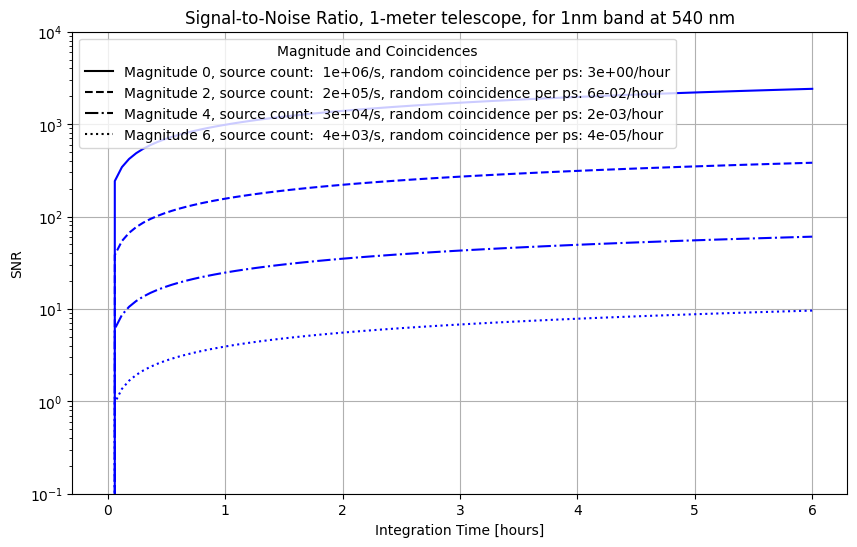

In [16]:
import matplotlib.lines as mlines

epsilon_O = 0.5
epsilon_D = 0.25
d = 0.3
A = area_sub(d)
B = 0
N_channels = 1 
lambda_ = 540e-9 # nm, wavelength filter for V-magnitude
delta_lambda = 1e-9 # nm, spectral bandwidth

delta_t = 1e-12
def rand_coincidences1B(diameters, magnitude):
    counts = 1e6
    phi = Phi(magnitude, lambda_)
    area = area_sub(diameters)
    delta_nu = c*delta_lambda/(lambda_**2)
    sigma_t = 1e-12
    efficiency = np.sqrt(epsilon_O_1*epsilon_O_2)*np.sqrt(epsilon_D_1*epsilon_D_2)
    return (counts/(2*((area*efficiency*phi*delta_nu)**2)*sigma_t))/3600

def coincidences(T,diameter, magnitude):
    efficiency = np.sqrt(epsilon_O*epsilon_O)*np.sqrt(epsilon_D*epsilon_D)
    area = area_sub(diameter)
    phi = Phi(magnitude, lambda_)
    delta_nu = c*delta_lambda/(lambda_**2)
    sigma_t = 1e-12
    return 2*((area*efficiency*phi*delta_nu)**2)*sigma_t

def SNR(T, diameter, magnitude): # T in s
    efficiency = np.sqrt(epsilon_O*epsilon_O)*np.sqrt(epsilon_D*epsilon_D)
    A = area_sub(diameter)
    phi = Phi(magnitude, lambda_)
    area_background = np.sqrt((A*A)/((1+B/phi)*(1+B/phi)))
    channels = np.sqrt(N_channels)
    time = np.sqrt(T*3600/np.sqrt(delta_t*delta_t))
    Gamma = 0.5
    return efficiency*area_background*channels*time*phi*Gamma**2

T_0 = np.linspace(0, 6, 100)
diameters = [0.6, 1.0, 4.0]
magnitudes = [0, 2, 4, 6]

diameter = 1
# Plot SNR vs integration time T_0
plt.figure(figsize=(10, 6))

colors = ['r', 'b', 'g']  # Different colors for different diameters
linestyles = ['-', '--', '-.', ':']  # Different linestyles for different magnitudes

legend_entries = []
efficiency = np.sqrt(epsilon_O*epsilon_O)*np.sqrt(epsilon_D*epsilon_D)


for j, magnitude in enumerate(magnitudes):
    snr_values = [SNR(t * 3600, diameter, magnitude) for t in T_0]
    plt.plot(T_0, snr_values, color='b', linestyle=linestyles[j], 
                 label=f'Diameter {diameter} m, Mag {magnitude}')
    coinc = coincidences(1, diameter, magnitude)
    sourcecount =efficiency*Phi(magnitude, lambda_)*area_sub(diameter)*c*delta_lambda/(lambda_**2)
    legend_entries.append(mlines.Line2D([], [], color='black', linestyle=linestyles[j],
                                        label=f'Magnitude {magnitude}, source count:  {sourcecount:.0e}/s, random coincidence per ps: {coinc:.0e}/hour'))
        
plt.xlabel('Integration Time [hours]')
plt.ylim(1e-1, 1e4)
plt.ylabel('SNR')
plt.title('Signal-to-Noise Ratio, 1-meter telescope, for 1nm band at 540 nm')



plt.legend(handles=legend_entries, loc='upper left', title="Magnitude and Coincidences")
plt.yscale("log")

plt.grid(True)
plt.show()

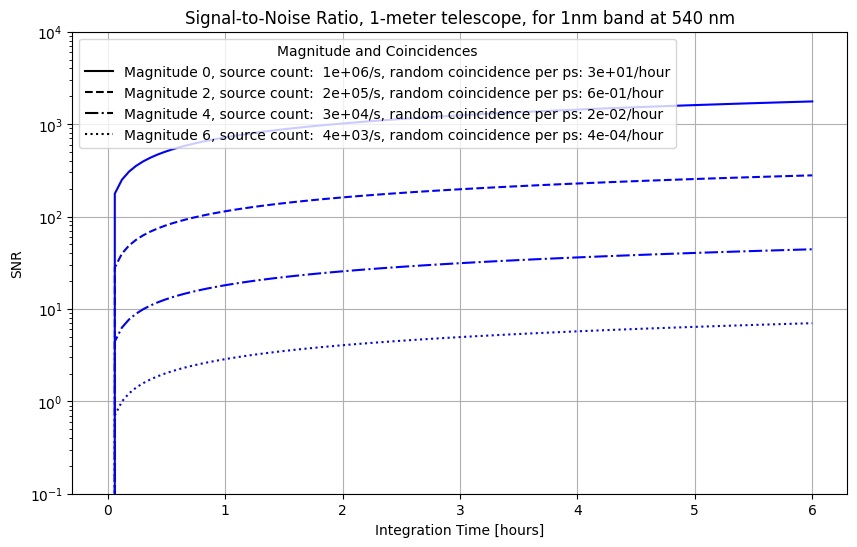

In [29]:
import matplotlib.lines as mlines

epsilon_O = 0.5
epsilon_D = 0.25
d = 0.3
A = area_sub(d)
B = 0
N_channels = 1 
lambda_ = 540e-9 # nm, wavelength filter for V-magnitude
delta_lambda = 1e-9 # nm, spectral bandwidth

delta_t = 3e-11
def rand_coincidences1B(diameters, magnitude):
    counts = 1e6
    phi = Phi(magnitude, lambda_)
    area = area_sub(diameters)
    delta_nu = c*delta_lambda/(lambda_**2)
    sigma_t = 1e-12
    efficiency = np.sqrt(epsilon_O_1*epsilon_O_2)*np.sqrt(epsilon_D_1*epsilon_D_2)
    return (counts/(2*((area*efficiency*phi*delta_nu)**2)*sigma_t))/3600

def coincidences(T,diameter, magnitude):
    efficiency = np.sqrt(epsilon_O*epsilon_O)*np.sqrt(epsilon_D*epsilon_D)
    area = area_sub(diameter)
    phi = Phi(magnitude, lambda_)
    delta_nu = c*delta_lambda/(lambda_**2)
    sigma_t = 1e-11
    return 2*((area*efficiency*phi*delta_nu)**2)*sigma_t

def SNR(T, diameter, magnitude): # T in s
    efficiency = np.sqrt(epsilon_O*epsilon_O)*np.sqrt(epsilon_D*epsilon_D)
    A = area_sub(diameter)
    phi = Phi(magnitude, lambda_)
    area_background = np.sqrt((A*A)/((1+B/phi)*(1+B/phi)))
    channels = np.sqrt(N_channels)
    time = np.sqrt(T*3600/(delta_t))
    Gamma = 1
    return efficiency*area_background*channels*time*phi*Gamma**2

T_0 = np.linspace(0, 6, 100)
diameters = [0.6, 1.0, 4.0]
magnitudes = [0, 2, 4, 6]

diameter = 1
# Plot SNR vs integration time T_0
plt.figure(figsize=(10, 6))

colors = ['r', 'b', 'g']  # Different colors for different diameters
linestyles = ['-', '--', '-.', ':']  # Different linestyles for different magnitudes

legend_entries = []
efficiency = np.sqrt(epsilon_O*epsilon_O)*np.sqrt(epsilon_D*epsilon_D)


for j, magnitude in enumerate(magnitudes):
    snr_values = [SNR(t * 3600, diameter, magnitude) for t in T_0]
    plt.plot(T_0, snr_values, color='b', linestyle=linestyles[j], 
                 label=f'Diameter {diameter} m, Mag {magnitude}')
    coinc = coincidences(1, diameter, magnitude)
    sourcecount =efficiency*Phi(magnitude, lambda_)*area_sub(diameter)*c*delta_lambda/(lambda_**2)
    legend_entries.append(mlines.Line2D([], [], color='black', linestyle=linestyles[j],
                                        label=f'Magnitude {magnitude}, source count:  {sourcecount:.0e}/s, random coincidence per ps: {coinc:.0e}/hour'))
        
plt.xlabel('Integration Time [hours]')
plt.ylim(1e-1, 1e4)
plt.ylabel('SNR')
plt.title('Signal-to-Noise Ratio, 1-meter telescope, for 1nm band at 540 nm')



plt.legend(handles=legend_entries, loc='upper left', title="Magnitude and Coincidences")
plt.yscale("log")

plt.grid(True)
plt.show()

In [28]:
phi_2 = Phi(2, lambda_)
print(phi_2)
area_sub(1)
print(c*delta_lambda/(lambda_**2))
print(SNR(1, 1, 2))

7.821445649871708e-06
1028094849108.3677
1.8978626040882232


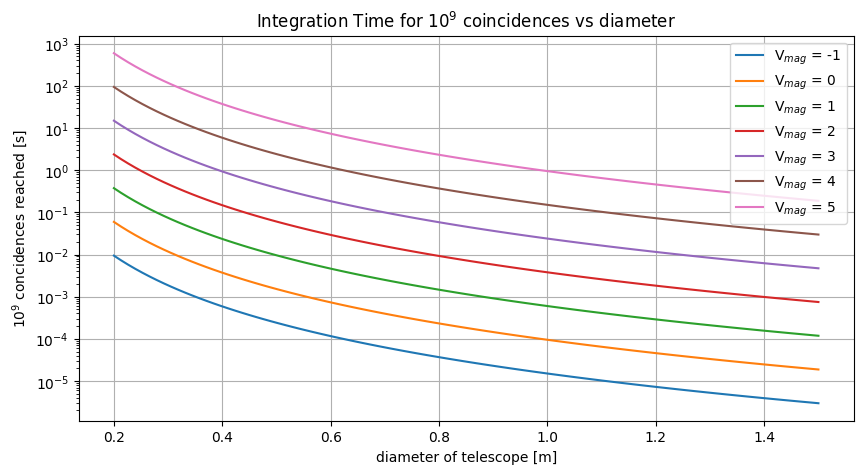

In [7]:
epsilon_O_1 = 0.5
epsilon_O_2 = 0.5
epsilon_D_1 = 0.25
epsilon_D_2 = 0.25
d_1 = 0.3
d_2 = 0.6

B_1 = 0
B_2 = 0
N_channels = 1 


delta_tau_1 = 3e-11
delta_tau_2 = 3e-11

delta_lambda = 1e-9 # nm, spectral bandwidth
lambda_ = 540e-9 # nm, wavelength filter for V-magnitude
delta_nu = c*delta_lambda/(lambda_**2)
#print("delta_nu = ", delta_nu)

def billion_coincidences(diameter, magnitude):
    SNR = 1e9
    phi = Phi(magnitude, lambda_)
    efficiency = np.sqrt(epsilon_O_1*epsilon_O_2)*np.sqrt(epsilon_D_1*epsilon_D_2)
    area = area_sub(diameter)
    channels = np.sqrt(N_channels)
    visibility = 0.5
    delta_tau = np.sqrt(delta_tau_1*delta_tau_2)
    delta_nu = c*delta_lambda/(lambda_**2)
    return ((SNR/(efficiency*area*visibility*channels*phi*delta_nu))**2)*delta_tau


plt.figure(figsize=(10, 5))

magnitudes1 = [-1 ,0, 1, 2, 3, 4, 5]
diameters = np.linspace(0.2, 1.5, 100)
for index, mag in enumerate(magnitudes1):
    plt.plot(diameters, billion_coincidences(diameters, mag), label=f'V$_{{mag}}$ = {mag}')
plt.xlabel('diameter of telescope [m]')
plt.ylabel('10$^9$ concidences reached [s]')
plt.title('Integration Time for 10$^9$ coincidences vs diameter')
plt.yscale("log")

plt.legend()
plt.grid(True)

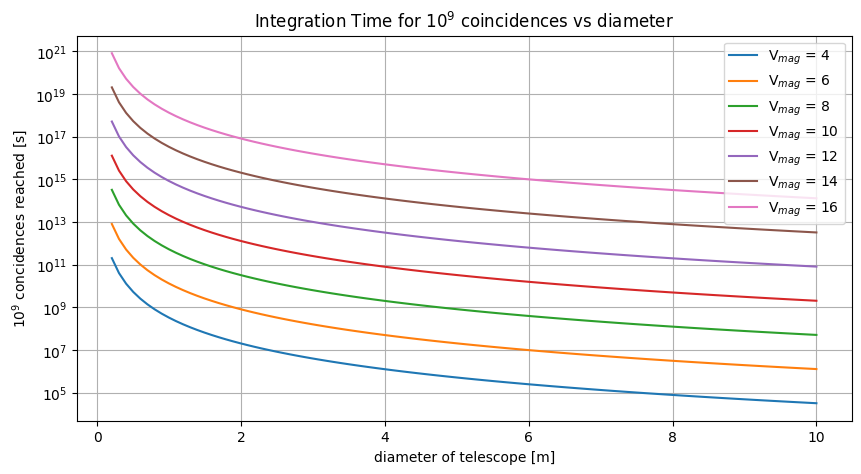

In [8]:
# formula for the random coincidences as a function of diameters and magnitude
def rand_coincidences(diameters, magnitude):
    phi = Phi(magnitude, lambda_)
    return 2*(area_sub(diameters)*phi)**2*delta_tau_1

# formula returning the integration time needed to reach 1B coincidences
def rand_coincidences1B(diameters, magnitude):
    counts = 1e9
    phi = Phi(magnitude, lambda_)
    area = area_sub(diameters)
    delta_nu = c*delta_lambda/(lambda_**2)
    return counts/(2*((area*phi*delta_nu)**2)*delta_tau_1)

plt.figure(figsize=(10, 5))

magnitudes1 = [4, 6, 8, 10, 12, 14, 16]
diameters = np.linspace(0.2, 10, 100)

for index, mag in enumerate(magnitudes1):
    plt.plot(diameters, rand_coincidences1B(diameters, mag), label=f'V$_{{mag}}$ = {mag}')
plt.xlabel('diameter of telescope [m]')
plt.ylabel('10$^9$ concidences reached [s]')
plt.title('Integration Time for 10$^9$ coincidences vs diameter')
plt.yscale("log")

plt.legend()
plt.grid(True)
plt.show()


4.934998577239221e-05
9.726729015978114e-13
7.821445649871708e-06
9.726729015978114e-13
1.239615596568624e-06
9.726729015978114e-13
1.9646583202702472e-07
9.726729015978114e-13
3.113773597308396e-08
9.726729015978114e-13
4.934998577239221e-09
9.726729015978114e-13
7.821445649871709e-10
9.726729015978114e-13


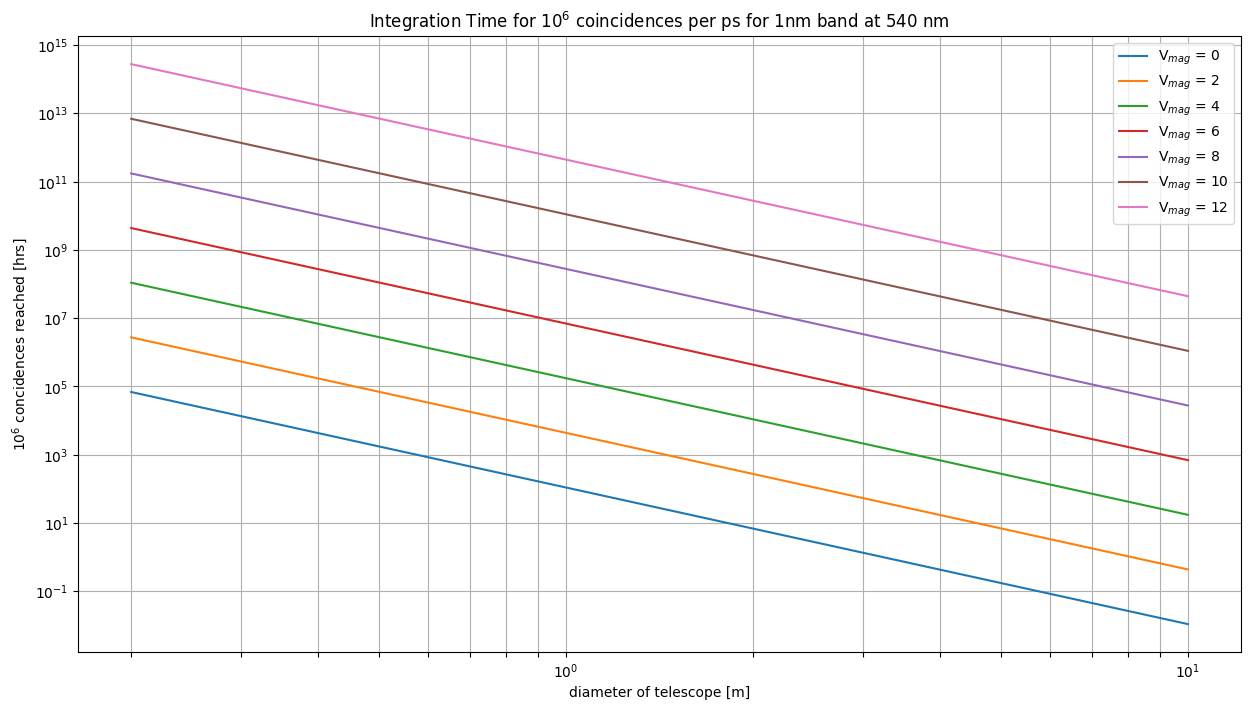

In [9]:
# formula returning the integration time needed to reach 1B coincidences (hours)
def rand_coincidences1B(diameters, magnitude):
    counts = 1e6
    phi = Phi(magnitude, lambda_)
    print(phi)
    area = area_sub(diameters)
    #print(area)
    delta_nu = c*delta_lambda/(lambda_**2)
    print(1/delta_nu)
    sigma_t = 1e-12
    efficiency = np.sqrt(epsilon_O_1*epsilon_O_2)*np.sqrt(epsilon_D_1*epsilon_D_2)
    return (counts/(2*((area*efficiency*phi*delta_nu)**2)*sigma_t))/3600

plt.figure(figsize=(15, 8))


magnitudes1 = [0, 2, 4, 6, 8, 10, 12]
#magnitudes1 = [0]
diameters = np.linspace(0.2, 10, 100)
for index, mag in enumerate(magnitudes1):
    plt.plot(diameters, rand_coincidences1B(diameters, mag), label=f'V$_{{mag}}$ = {mag}')
plt.xlabel('diameter of telescope [m]')
plt.ylabel('10$^6$ concidences reached [hrs]')
plt.title('Integration Time for 10$^6$ coincidences per ps for 1nm band at 540 nm')
plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.grid(True)

from matplotlib.ticker import LogLocator

# Custom tick setting for the x-axis
ax = plt.gca()
ax.xaxis.set_major_locator(LogLocator(base=10.0, subs=np.arange(1, 10) * 0.1, numticks=15))  # More dense ticks
ax.xaxis.set_minor_locator(LogLocator(base=10.0, subs=np.arange(1, 10) * 0.001, numticks=20))  # Even more fine-grained minor ticks



9.726729015978114e-13
9.726729015978114e-13
9.726729015978114e-13
9.726729015978114e-13
9.726729015978114e-13
9.726729015978114e-13
9.726729015978114e-13


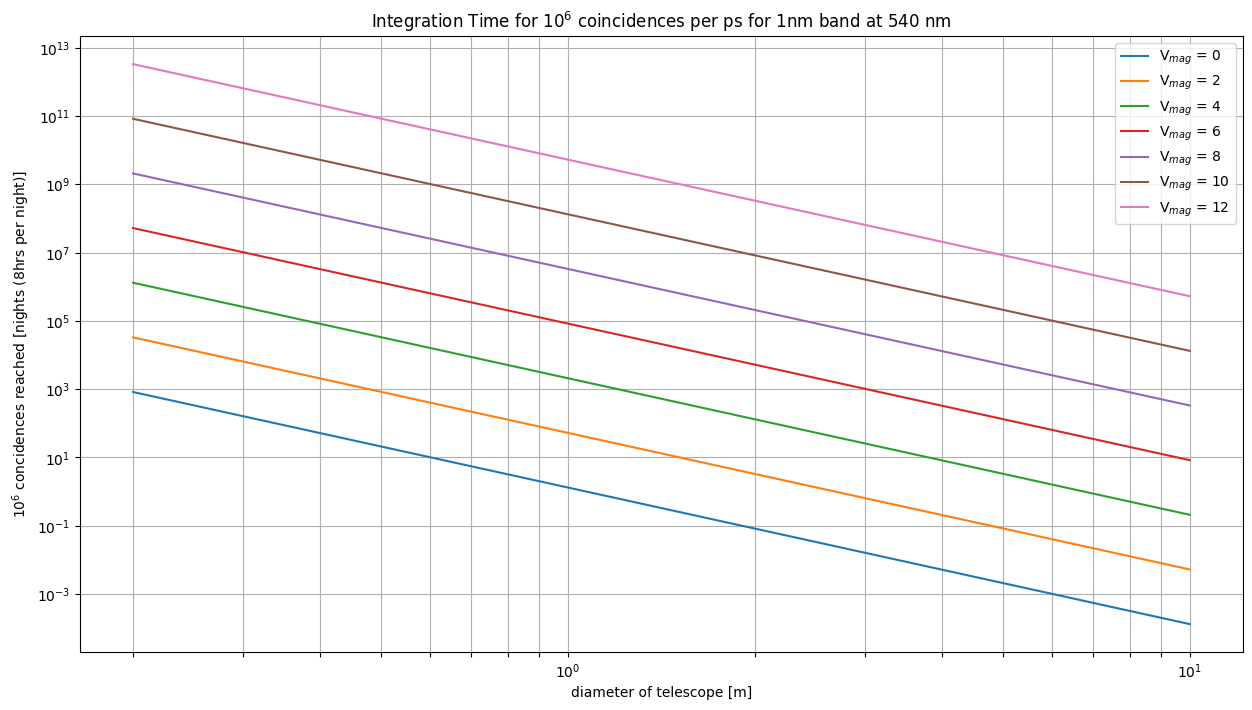

In [10]:
# formula returning the integration time needed to reach 1B coincidences (nights)
def rand_coincidences1B(diameters, magnitude):
    counts = 1e6
    phi = Phi(magnitude, lambda_)
    area = area_sub(diameters)
    delta_nu = c*delta_lambda/(lambda_**2)
    print(1/delta_nu)
    sigma_t = 1e-11
    efficiency = np.sqrt(epsilon_O_1*epsilon_O_2)*np.sqrt(epsilon_D_1*epsilon_D_2)
    return (counts/(2*((area*efficiency*phi*delta_nu)**2)*sigma_t))/30000

plt.figure(figsize=(15, 8))

magnitudes1 = [0, 2, 4, 6, 8, 10, 12]
diameters = np.linspace(0.2, 10, 100)
for index, mag in enumerate(magnitudes1):
    plt.plot(diameters, rand_coincidences1B(diameters, mag), label=f'V$_{{mag}}$ = {mag}')
plt.xlabel('diameter of telescope [m]')
plt.ylabel('10$^6$ concidences reached [nights (8hrs per night)]')
plt.title('Integration Time for 10$^6$ coincidences per ps for 1nm band at 540 nm')
plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.grid(True)

from matplotlib.ticker import LogLocator

# Custom tick setting for the x-axis
ax = plt.gca()
ax.xaxis.set_major_locator(LogLocator(base=10.0, subs=np.arange(1, 10) * 0.1, numticks=15))  # More dense ticks
ax.xaxis.set_minor_locator(LogLocator(base=10.0, subs=np.arange(1, 10) * 0.001, numticks=20))  